In [253]:
import qiskit.tools.jupyter
%qiskit_version_table

In [254]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-01 23:36:35,432: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [255]:
from qiskit import QuantumRegister,QuantumCircuit,ClassicalRegister, execute, Aer, transpile
from qiskit.visualization import plot_histogram

In [256]:
#AB Devresinin İmplementasyonu
qreg_q_AB = QuantumRegister(2, 'q')
creg_c_AB = ClassicalRegister(2, 'c')
circuit_AB = QuantumCircuit(qreg_q_AB, creg_c_AB)

circuit_AB.h(qreg_q[1])
circuit_AB.cx(qreg_q[1], qreg_q[0])
circuit_AB.s(qreg_q[0])
circuit_AB.measure(qreg_q[1], creg_c[1])
circuit_AB.h(qreg_q[0])
circuit_AB.t(qreg_q[0])
circuit_AB.h(qreg_q[0])
circuit_AB.measure(qreg_q[0], creg_c[0])
circuit_AB.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q_0: ─────┤ X ├┤ S ├┤ H ├┤ T ├┤ H ├┤M├
     ┌───┐└─┬─┘└┬─┬┘└───┘└───┘└───┘└╥┘
q_1: ┤ H ├──■───┤M├─────────────────╫─
     └───┘      └╥┘                 ║ 
c: 2/════════════╩══════════════════╩═
                 1                  0

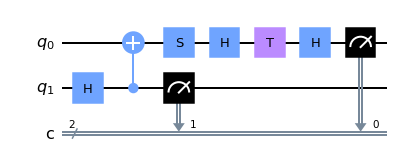

In [257]:
circuit_AB.draw('mpl')

In [258]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [259]:
backend = Aer.get_backend('statevector_simulator') 
result = backend.run(transpile(circuit_AB, backend)).result()
psi  = result.get_statevector(circuit_AB)

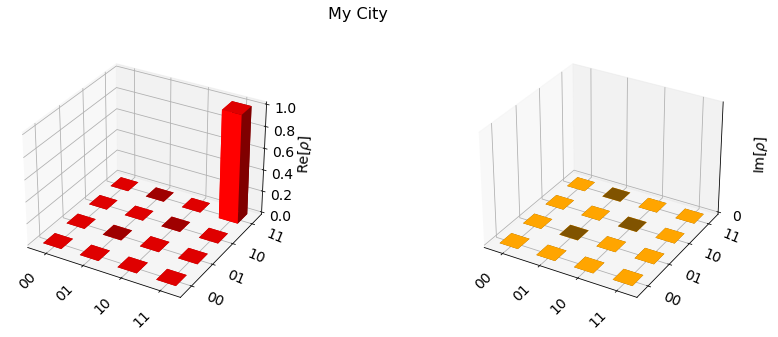

In [260]:
plot_state_city(psi, title="My City", color=['red', 'orange'])

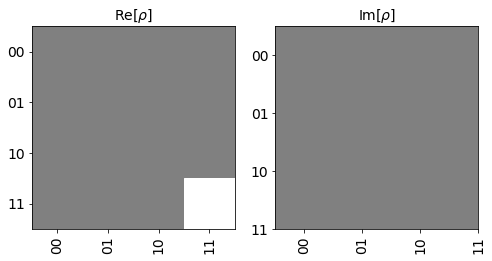

In [261]:
plot_state_hinton(psi)

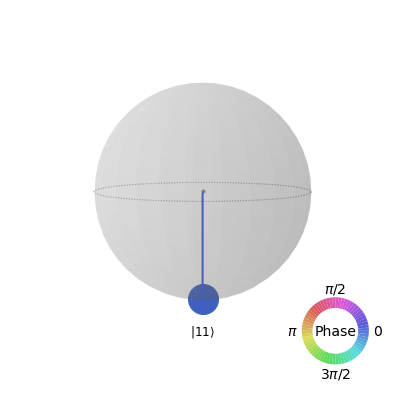

In [262]:
plot_state_qsphere(psi)

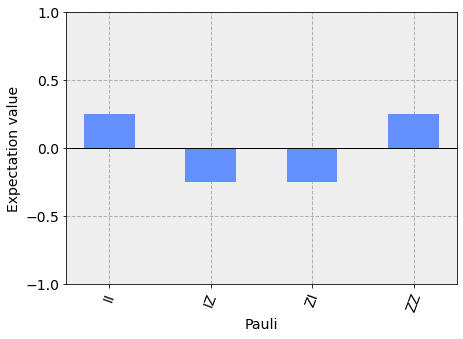

In [263]:
plot_state_paulivec(psi)

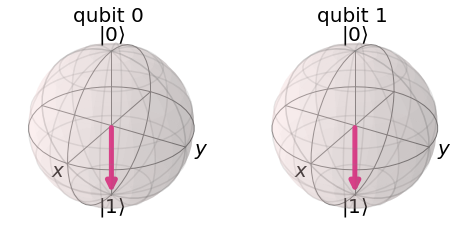

In [264]:
plot_bloch_multivector(psi)

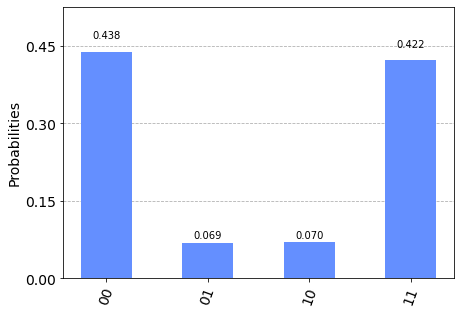

In [265]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit_AB, backend, shots = 2048).result()
counts = result.get_counts(circuit_AB)  
graph = plot_histogram(counts)
display(graph)

In [266]:
#AB' Devresinin İmplementasyonu
qreg_q_A_notB = QuantumRegister(2, 'q')
creg_c_A_notB = ClassicalRegister(2, 'c')
circuit_A_notB = QuantumCircuit(qreg_q_A_notB, creg_c_A_notB)

circuit_A_notB.h(qreg_q[1])
circuit_A_notB.cx(qreg_q[1], qreg_q[0])
circuit_A_notB.s(qreg_q[0])
circuit_A_notB.measure(qreg_q[1], creg_c[1])
circuit_A_notB.h(qreg_q[0])
circuit_A_notB.tdg(qreg_q[0])
circuit_A_notB.h(qreg_q[0])
circuit_A_notB.measure(qreg_q[0], creg_c[0])
circuit_A_notB.draw()

┌───┐┌───┐┌───┐┌─────┐┌───┐┌─┐
q_0: ─────┤ X ├┤ S ├┤ H ├┤ Tdg ├┤ H ├┤M├
     ┌───┐└─┬─┘└┬─┬┘└───┘└─────┘└───┘└╥┘
q_1: ┤ H ├──■───┤M├───────────────────╫─
     └───┘      └╥┘                   ║ 
c: 2/════════════╩════════════════════╩═
                 1                    0

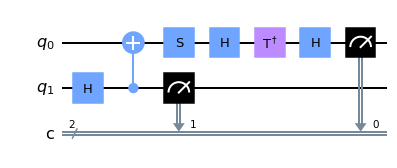

In [267]:
circuit_A_notB.draw('mpl')

In [268]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(circuit_A_notB, backend)).result()
psi  = result.get_statevector(circuit_A_notB)

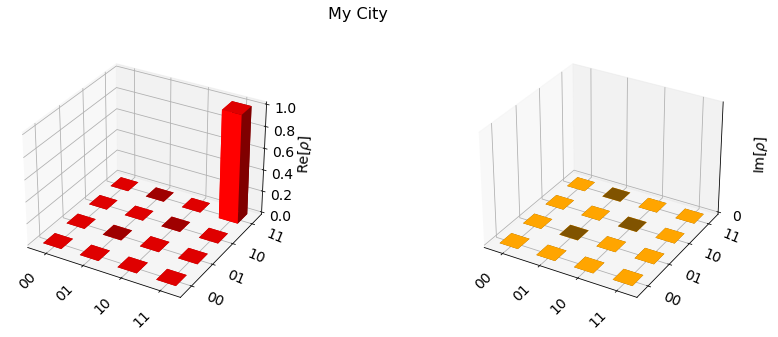

In [269]:
plot_state_city(psi, title="My City", color=['red', 'orange'])

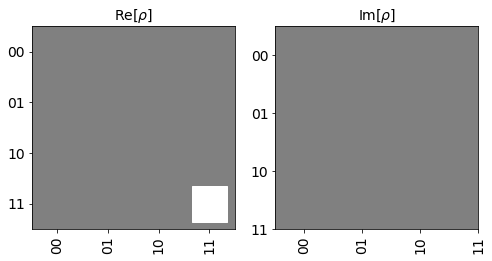

In [270]:
plot_state_hinton(psi)

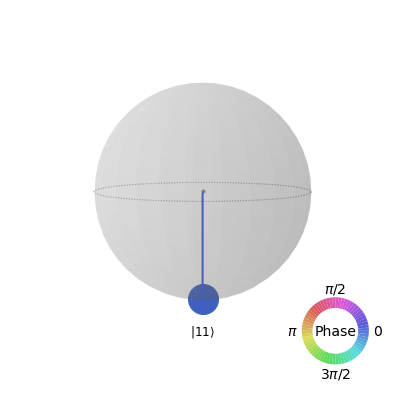

In [271]:
plot_state_qsphere(psi)

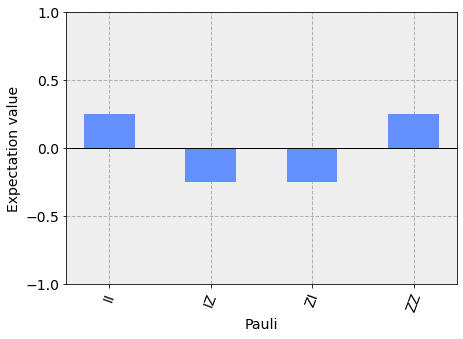

In [272]:
plot_state_paulivec(psi)

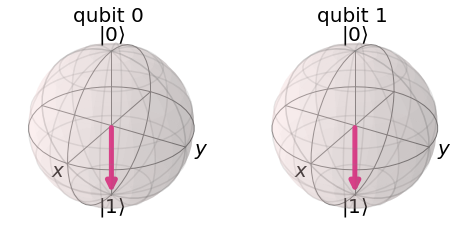

In [273]:
plot_bloch_multivector(psi)

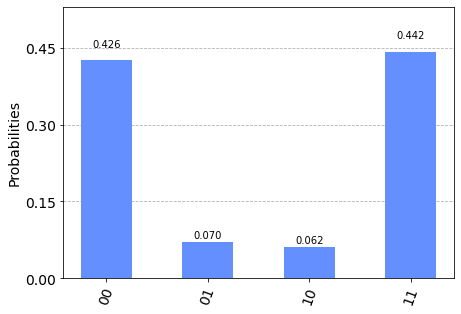

In [274]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit_A_notB, backend, shots = 2048).result()
counts = result.get_counts(circuit_A_notB)  
graph = plot_histogram(counts)
display(graph)

In [275]:
#A'B Devresinin İmplementasyonu
qreg_q_notA_B = QuantumRegister(2, 'q')
creg_c_notA_B = ClassicalRegister(2, 'c')
circuit_notA_B = QuantumCircuit(qreg_q_notA_B, creg_c_notA_B)

circuit_notA_B.h(qreg_q[1])
circuit_notA_B.cx(qreg_q[1], qreg_q[0])
circuit_notA_B.s(qreg_q[0])
circuit_notA_B.h(qreg_q[1])
circuit_notA_B.h(qreg_q[0])
circuit_notA_B.measure(qreg_q[1], creg_c[1])
circuit_notA_B.t(qreg_q[0])
circuit_notA_B.h(qreg_q[0])
circuit_notA_B.measure(qreg_q[0], creg_c[0])
circuit_notA_B.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q_0: ─────┤ X ├┤ S ├┤ H ├┤ T ├┤ H ├┤M├
     ┌───┐└─┬─┘├───┤└┬─┬┘└───┘└───┘└╥┘
q_1: ┤ H ├──■──┤ H ├─┤M├────────────╫─
     └───┘     └───┘ └╥┘            ║ 
c: 2/═════════════════╩═════════════╩═
                      1             0

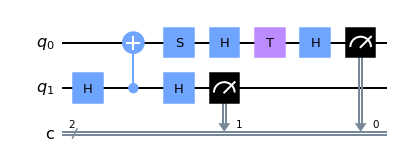

In [276]:
circuit_notA_B.draw('mpl')

In [277]:
backend = Aer.get_backend('statevector_simulator') 
result = backend.run(transpile(circuit_notA_B, backend)).result()
psi  = result.get_statevector(circuit_notA_B)

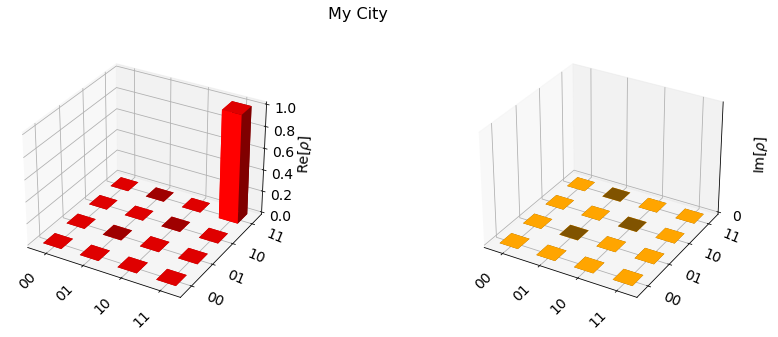

In [278]:
plot_state_city(psi, title="My City", color=['red', 'orange'])

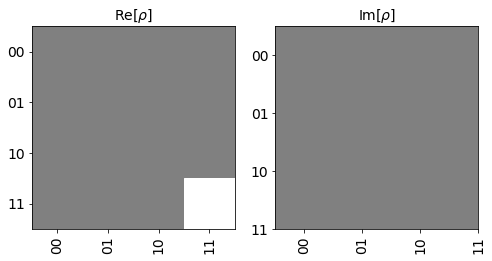

In [279]:
plot_state_hinton(psi)

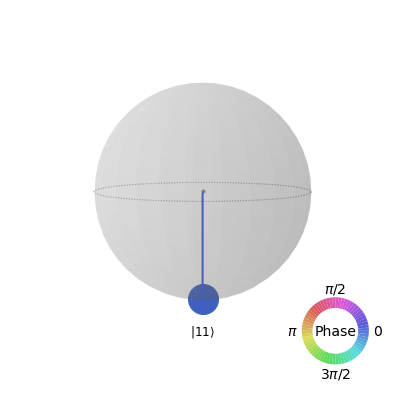

In [280]:
plot_state_qsphere(psi)

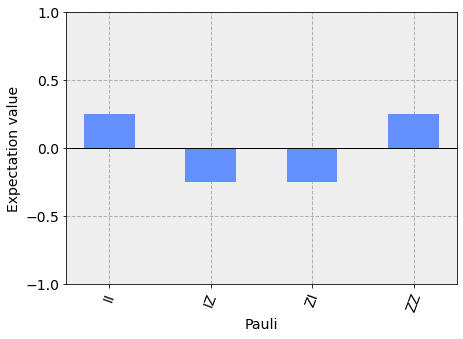

In [281]:
plot_state_paulivec(psi)

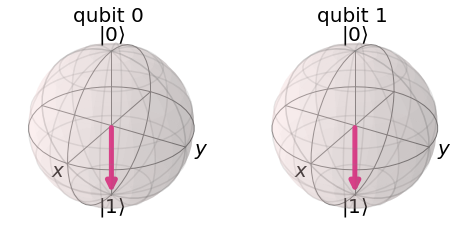

In [282]:
plot_bloch_multivector(psi)

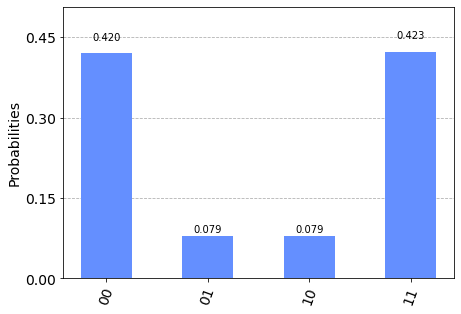

In [283]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit_notA_B, backend, shots = 2048).result()
counts = result.get_counts(circuit_notA_B)  
graph = plot_histogram(counts)
display(graph)

In [284]:
#A'B' Devresinin İmplementasyonu
qreg_q_notA_notB = QuantumRegister(2, 'q')
creg_c_notA_notB = ClassicalRegister(2, 'c')
circuit_notA_notB = QuantumCircuit(qreg_q_notA_notB, creg_c_notA_notB)

circuit_notA_notB.h(qreg_q[1])
circuit_notA_notB.cx(qreg_q[1], qreg_q[0])
circuit_notA_notB.s(qreg_q[0])
circuit_notA_notB.h(qreg_q[1])
circuit_notA_notB.h(qreg_q[0])
circuit_notA_notB.measure(qreg_q[1], creg_c[1])
circuit_notA_notB.tdg(qreg_q[0])
circuit_notA_notB.h(qreg_q[0])
circuit_notA_notB.measure(qreg_q[0], creg_c[0])
circuit_notA_notB.draw()

┌───┐┌───┐┌───┐┌─────┐┌───┐┌─┐
q_0: ─────┤ X ├┤ S ├┤ H ├┤ Tdg ├┤ H ├┤M├
     ┌───┐└─┬─┘├───┤└┬─┬┘└─────┘└───┘└╥┘
q_1: ┤ H ├──■──┤ H ├─┤M├──────────────╫─
     └───┘     └───┘ └╥┘              ║ 
c: 2/═════════════════╩═══════════════╩═
                      1               0

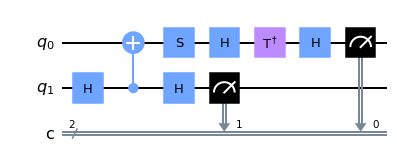

In [285]:
circuit_notA_notB.draw('mpl')

In [286]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(circuit_notA_notB, backend)).result()
psi  = result.get_statevector(circuit_notA_notB)

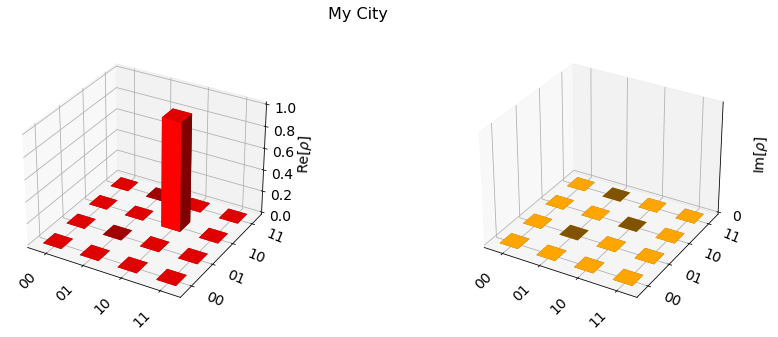

In [287]:
plot_state_city(psi, title="My City", color=['red', 'orange'])

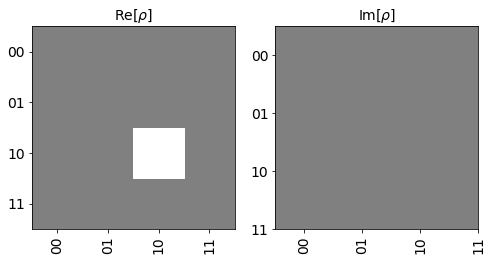

In [288]:
plot_state_hinton(psi)

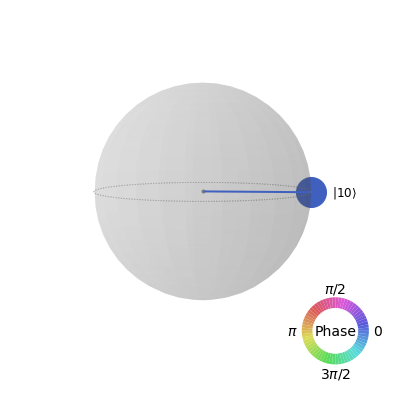

In [289]:
plot_state_qsphere(psi)

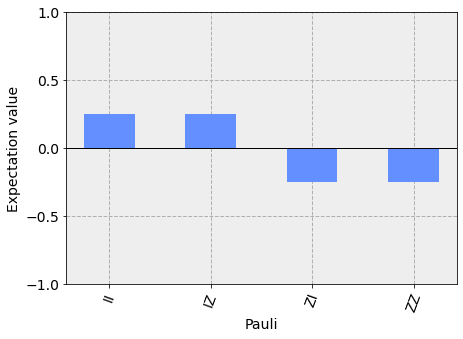

In [290]:
plot_state_paulivec(psi)

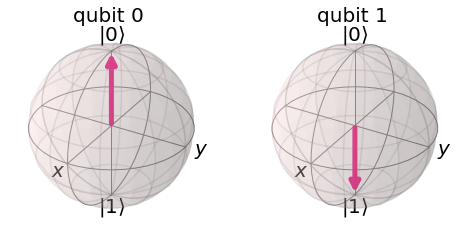

In [291]:
plot_bloch_multivector(psi)

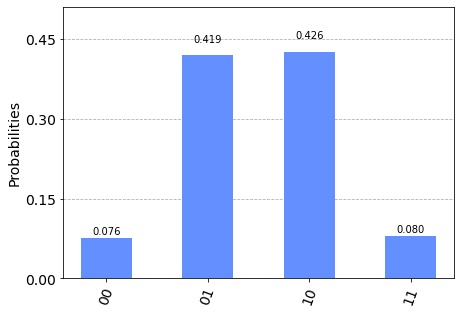

In [292]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit_notA_notB, backend, shots = 2048).result()
counts = result.get_counts(circuit_notA_notB)  
graph = plot_histogram(counts)
display(graph)